In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
import os

In [20]:
# Experiment 1 groups and labels
# groups = {"SVC": 0, "Trees": 1, "NB": 2, "Neighbors":3, "Linear":4, "DA":5, "nn":6, "Dummy":7}
# labels = ["SVC", "Trees", "NB", "Neighbors", "Linear", "DA", "Network", "Dummy"]
# dir = "experiment1/finalgraphs"

# # Experiment 2 groups and labels
groups = {"LDA": 0, "QDA": 1, "Trees": 2}
labels = ["LDA", "QDA", "Trees"]
dir = "experiment2/finalgraphs"

MAE_matrix = np.zeros((3,3))
MAE_stdev = np.zeros((3,3))
CI_matrix = np.zeros((3,3))
CI_stdev = np.zeros((3,3))
CI_sizes = np.zeros((3,3))
CI_sizes_stdev = np.zeros((3,3))

for trained_on in groups.keys():
    for eval_on in groups.keys(): 
        file_dir = f"experiment2/trained{trained_on}/eval{eval_on}/aggregate_augment/data_summary_trained{trained_on}_eval{eval_on}.txt"
        with open(file_dir, 'r') as file:
            lines = file.readlines()
            
        print(trained_on + eval_on + lines[1])
        
        MAE_info = lines[1]
        percent_CI_info = lines[3]
        
        x = MAE_info.split(" ")[3].removeprefix("avg:").removesuffix(",")
        MAE = float(x)
        
        stdev = MAE_info.split(" ")[4].removeprefix("stdev:").removesuffix(",")
        stdev = float(stdev)
        
        MAE_matrix[groups[trained_on]][groups[eval_on]] = MAE
        MAE_stdev[groups[trained_on]][groups[eval_on]] = stdev
        
        percent_in_CI = eval(lines[2])
        percent_in_CI = [i * 100 for i in percent_in_CI]
        avg = np.average(percent_in_CI)
        stdev = np.std(percent_in_CI)
        
        CI_matrix[groups[trained_on]][groups[eval_on]] = avg
        CI_stdev[groups[trained_on]][groups[eval_on]] = stdev
        
        sizes = eval(lines[4])
        avg = np.average(sizes)
        stdev = np.std(sizes)
        
        CI_sizes[groups[trained_on]][groups[eval_on]] = avg
        CI_sizes_stdev[groups[trained_on]][groups[eval_on]] = stdev

print(MAE_matrix)

pass

LDALDAMean absolute errors. avg:0.05448337128148728, stdev:0.07481319161033399

LDAQDAMean absolute errors. avg:0.1521161357396582, stdev:0.16255215968883147

LDATreesMean absolute errors. avg:0.05170391153682943, stdev:0.07147936294220708
QDALDAMean absolute errors. avg:0.11774635430622991, stdev:0.13119474197933212

QDAQDAMean absolute errors. avg:0.12704344978631374, stdev:0.1255259337706355

QDATreesMean absolute errors. avg:0.09758106628582945, stdev:0.10327300231156955
TreesLDAMean absolute errors. avg:0.06221875060947786, stdev:0.06800433704226246

TreesQDAMean absolute errors. avg:0.1231024953666853, stdev:0.11452619542138054

TreesTreesMean absolute errors. avg:0.03762294938401065, stdev:0.05101110560500412

[[0.05448337 0.15211614 0.05170391]
 [0.11774635 0.12704345 0.09758107]
 [0.06221875 0.1231025  0.03762295]]


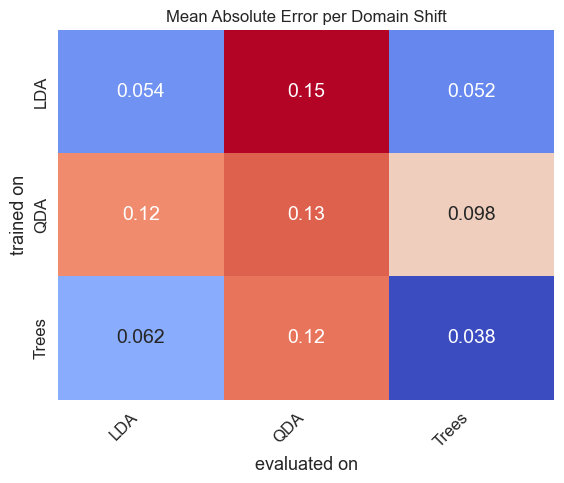

In [32]:
plot = sns.heatmap(MAE_matrix, 
            cmap="coolwarm",
            annot=True,
            annot_kws={"size": 14},
            vmax=0.14,
            xticklabels=labels,
            yticklabels=labels,
            cbar=False)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plot.xaxis.label.set_size(13)
plot.yaxis.label.set_size(13)

name = "Mean Absolute Error per Domain Shift"
plot.set_title(name)
os.makedirs(dir, exist_ok=True)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

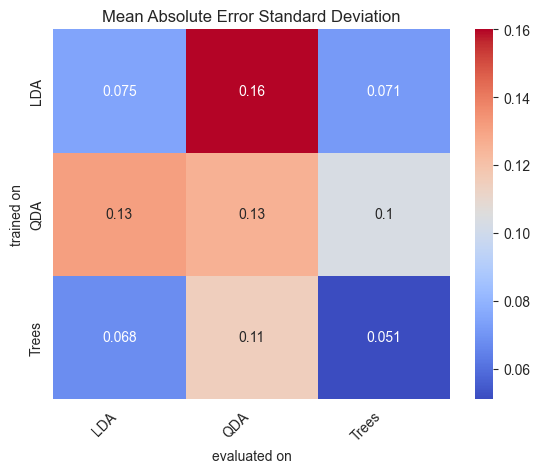

In [25]:
plot = sns.heatmap(MAE_stdev, 
            cmap="coolwarm",
            annot=True,
            vmax= 0.16,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Mean Absolute Error Standard Deviation"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_44820\1807750150.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


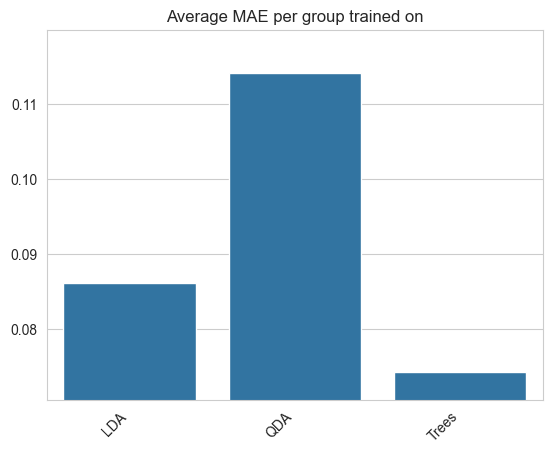

In [26]:
error_per_trained = np.average(MAE_matrix, axis=1)
high = max(error_per_trained) * 1.05
low = min(error_per_trained) * 0.95
plot = sns.barplot(x=labels, y=error_per_trained)
plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE per group trained on"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_44820\2552758926.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


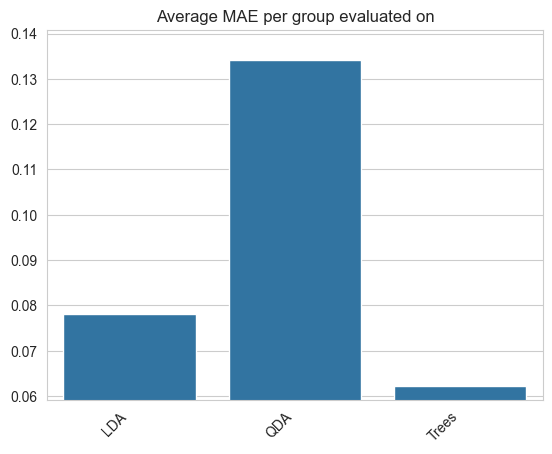

In [27]:
error_per_evaluated = np.average(MAE_matrix, axis=0)
high = max(error_per_evaluated) * 1.05
low = min(error_per_evaluated) * 0.95
plot = sns.barplot(x=labels, y=error_per_evaluated)
plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE per group evaluated on"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

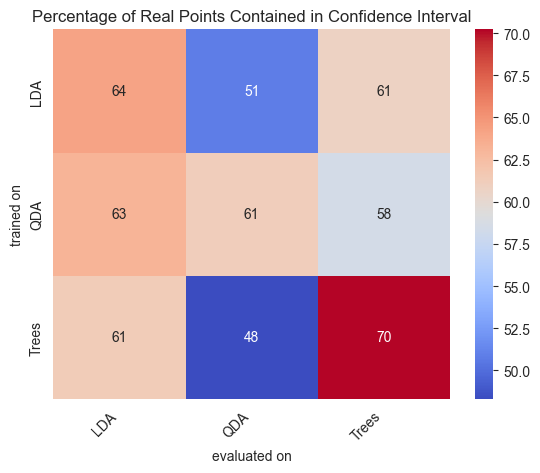

In [28]:
plot = sns.heatmap(CI_matrix, 
            cmap="coolwarm",
            annot=True,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Percentage of Real Points Contained in Confidence Interval"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

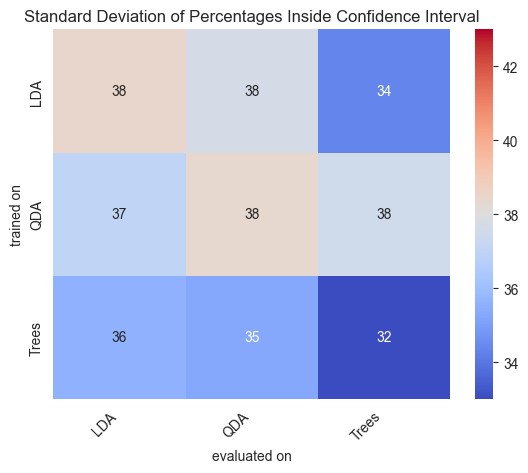

In [29]:
plot = sns.heatmap(CI_stdev, 
            cmap="coolwarm",
            annot=True,
            vmax=43,
            vmin=33,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Standard Deviation of Percentages Inside Confidence Interval"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

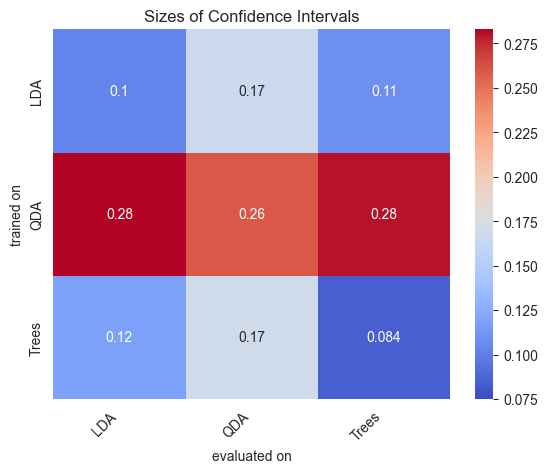

In [30]:
plot = sns.heatmap(CI_sizes, 
            cmap="coolwarm",
            annot=True,
            vmin=0.075,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Sizes of Confidence Intervals"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

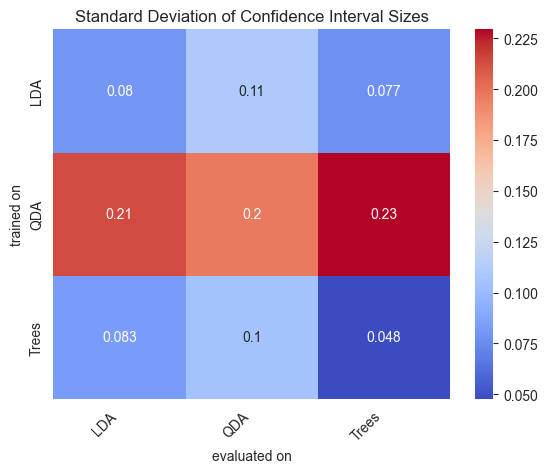

In [31]:
plot = sns.heatmap(CI_sizes_stdev, 
            cmap="coolwarm",
            annot=True,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Standard Deviation of Confidence Interval Sizes"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_31168\1908025625.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


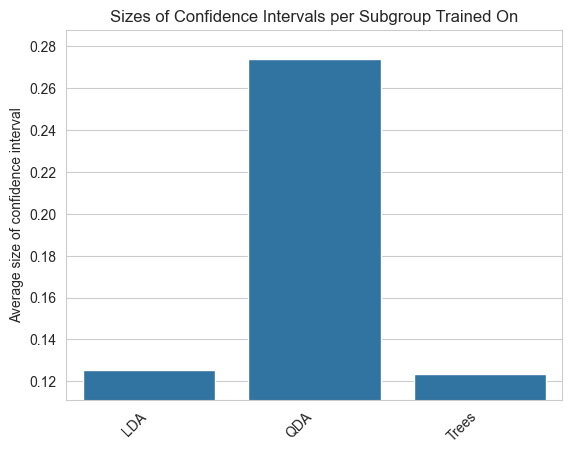

In [35]:
size_per_trained = np.average(CI_sizes, axis=1)
high = max(size_per_trained) * 1.05
low = min(size_per_trained) * 0.9
plot = sns.barplot(x=labels, y=size_per_trained)
plt.ylim([low, high])
plt.ylabel("Average size of confidence interval", fontsize=10)
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Sizes of Confidence Intervals per Subgroup Trained On"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

[[ 0.          0.09763276 -0.00277946]
 [-0.0092971   0.         -0.02946238]
 [ 0.0245958   0.08547955  0.        ]]


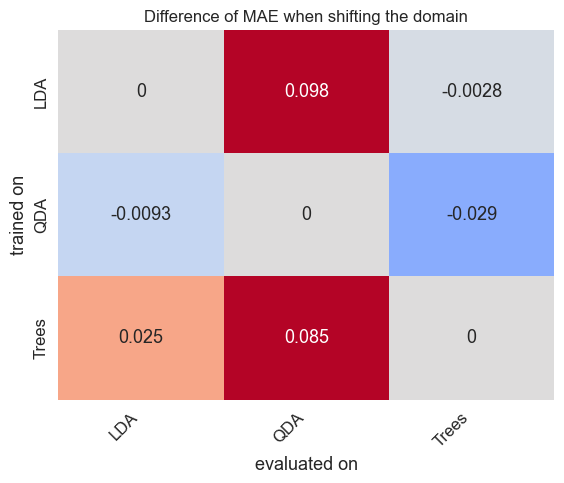

In [31]:
diff_matrix = np.zeros((3,3))
for i in range(3):
    for j in range(3):
        diff_matrix[i][j] = MAE_matrix[i][j] - MAE_matrix[i][i]
print(diff_matrix)
# labels = labels[0:7]
plot = sns.heatmap(diff_matrix, 
            cmap="coolwarm",
            annot=True,
            annot_kws={"size": 13},
            vmax= 0.057,
            center=0.0,
            xticklabels=labels,
            yticklabels=labels,
            cbar=False)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plot.xaxis.label.set_size(13)
plot.yaxis.label.set_size(13)

name = "Difference of MAE when shifting the domain"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

['LDA', 'QDA', 'Trees']


C:\Users\maxso\AppData\Local\Temp\ipykernel_44820\56698155.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


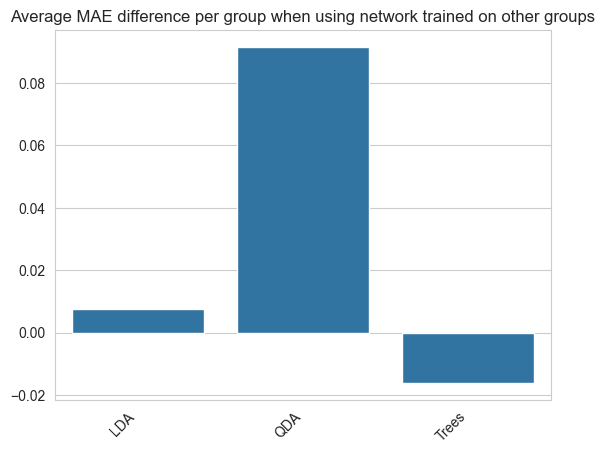

In [41]:
error_per_evaluated = np.sum(diff_matrix, axis=0)/2 #This is done as the evaluation by itself would be included is np.average is used
# high = max(error_per_evaluated) * 1.05
# low = min(error_per_evaluated) * 0.95
plot = sns.barplot(x=labels, y=error_per_evaluated)
print(labels)
# plt.ylim([low, high])
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE difference per group when using network trained on other groups"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_44820\3550454815.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


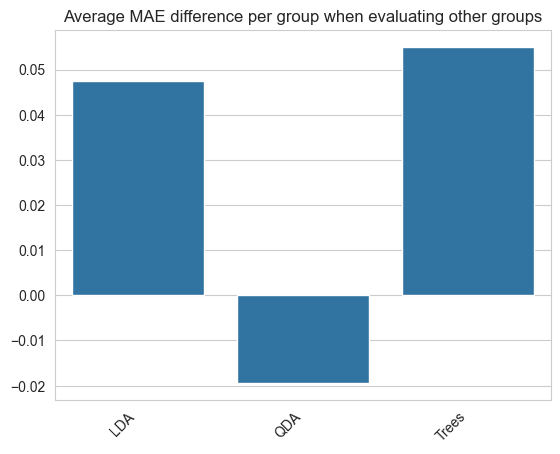

In [42]:
error_per_trained = np.sum(diff_matrix, axis=1)/2
plot = sns.barplot(x=labels, y=error_per_trained)
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Average MAE difference per group when evaluating other groups"
plot.set_title(name)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

['LDA', 'QDA', 'Trees']


C:\Users\maxso\AppData\Local\Temp\ipykernel_44820\1100610148.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


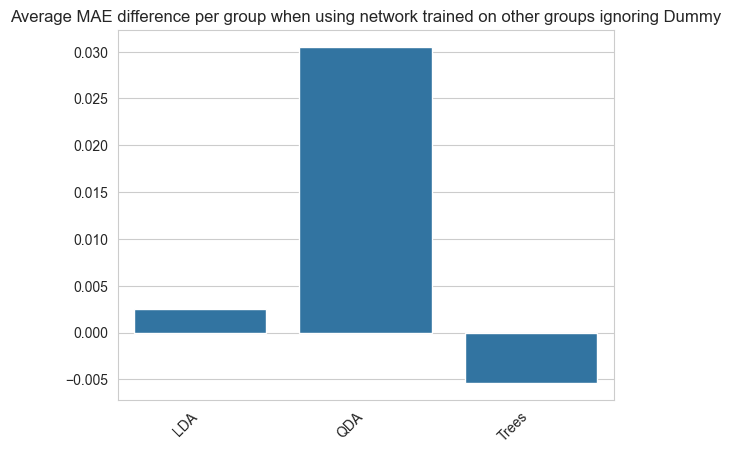

In [36]:
# diff_without_dummy = diff_matrix[0:7, 0:7]
# labels_without_dummy = labels[0:7]
# error_per_evaluated = np.sum(diff_without_dummy, axis=0)/6
# # high = max(error_per_evaluated) * 1.05
# # low = min(error_per_evaluated) * 0.95
# plot = sns.barplot(x=labels_without_dummy, y=error_per_evaluated)
# print(labels)
# # plt.ylim([low, high])
# plot.set_xticklabels(labels= labels, rotation=45, ha="right")
# name = "Average MAE difference per group when using network trained on other groups ignoring Dummy"
# plot.set_title(name)
# plt.savefig(f"{dir}/{name}", bbox_inches="tight")
# plt.show()

C:\Users\maxso\AppData\Local\Temp\ipykernel_44820\3858231211.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels= labels, rotation=45, ha="right")


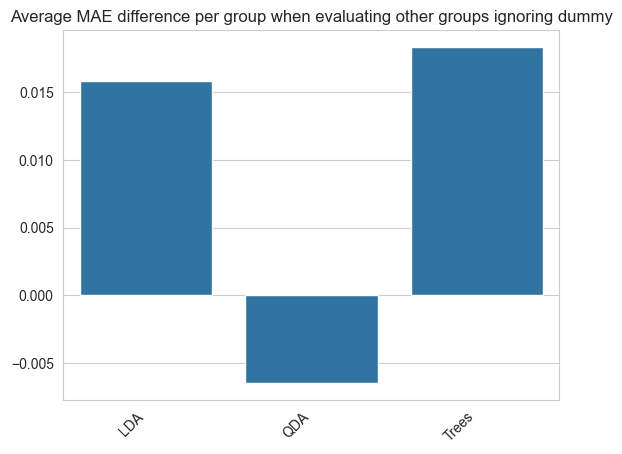

In [37]:
# error_per_trained = np.sum(diff_without_dummy, axis=1)/6
# plot = sns.barplot(x=labels_without_dummy, y=error_per_trained)
# plot.set_xticklabels(labels= labels, rotation=45, ha="right")
# name = "Average MAE difference per group when evaluating other groups ignoring dummy"
# plot.set_title(name)
# plt.savefig(f"{dir}/{name}", bbox_inches="tight")
# plt.show()